# Mathematical Analysis of: Modeling shows that the NS5A inhibitor daclatasvir has two modes of action and yields a shorter estimate of the hepatitis C virus half-life

### Replication of Model Attempt 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import Bounds

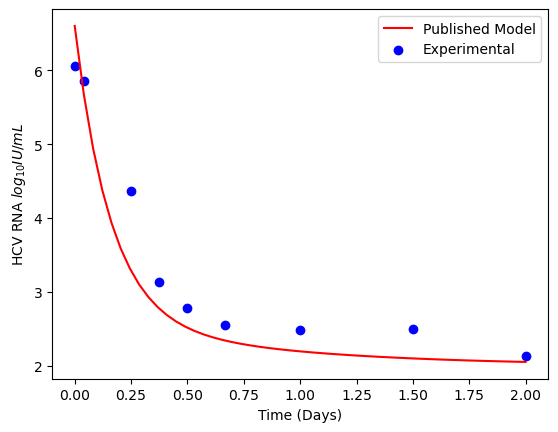

In [2]:
def Model(x, t):
    T = x[0]
    I = x[1]
    V = x[2]
    
    
    B =  3e-07
    delta =  1.06
    p = 8.3
    c = 6.2
    epsilon = 0.98
    Cp = c*(1-epsilon)
    d = np.log(2)/Cp
    T0 = c*delta/(p*B)
    s = T0*np.exp(t)
    
    dTdt = s - d*T - B*V*T
    dIdt = B*V*T - delta*I
    dVdt = (1-epsilon)*p*I - c*V + 2*6.06 
        
    return ([dTdt, dIdt, dVdt])
    
beta =  3e-07
rho = 8.3
c = 22.37
delta =  1.06

V0 = 6.6
I0 = c*V0/rho
T0 = c*delta/(rho*beta)
R0 = 15

# Initial conditions
x0 = [T0, I0, V0]  # Define initial values for T, I, V
t = np.linspace(0, 2, 50)  # Time array

# Solve the ODE system
sol1 = odeint(Model, x0, t)

# Retrieve results
T_result1 = sol1[:, 0]
I_result1 = sol1[:, 1]
V_result1 = sol1[:, 2]
plt.plot (t, V_result1, color = 'red', label = 'Published Model')


V_data1 = np.array([6.06,5.85,4.37,3.14,2.79,2.56,2.48,2.50,2.13])
Time_data1 = np.array([0,1,6,9,12,16,24,36,48])/24


plt.scatter(Time_data1, V_data1, color = 'blue', label = 'Experimental')
plt.xlabel('Time (Days)')
plt.ylabel('HCV RNA $log_{10} IU/mL$')
plt.legend()
plt.show()

#### Unsuccessful in accurately replicating the model shown in the publication. The model, however, is of decent quality and fits the experimental data fairly well. 

### Construction of my own model and optimized parameters

In [3]:
def My_Model(x, t, params):
    T = x[0]
    I = x[1]
    V = x[2]
    
    epsilon, c, delta = params
    
    
    B =  3e-07
    p = 8.3
    Cp = c*(1-epsilon)
    d = np.log(2)/Cp
    T0 = c*delta/(p*B)
    s = T0*np.exp(t)
    
    dTdt = s - d*T - B*V*T
    dIdt = B*V*T - delta*I
    dVdt = (1-epsilon)*p*I - c*V 
        
    return ([dTdt, dIdt, dVdt])

Int_vals = np.array([0.5, 20, 1])

def Cost_Func(params, *args):
    Opt_params = params
    V_data, Time_data, Int_vals = args 
    
    model_result = odeint(My_Model, Int_vals, Time_data, args=(Opt_params,))
    
    error_func = np.sum((model_result[:, 2] - V_data) ** 2)
    return error_func

Params_guess = np.array([0.999, 22.4, 1.06])

Bounds = ((0,0.99), (1,100), (1.0897,10))
# Using a different optimization method that supports bounds
sol = minimize(Cost_Func, Params_guess, args=(V_data1, Time_data1, Int_vals), method='L-BFGS-B', bounds=Bounds)

Sol_params = sol.x 

print(Sol_params)

[ 0.48803394 22.31712383  1.16517257]


0.4880339374991975 1.1651725673858118 22.31712382627841


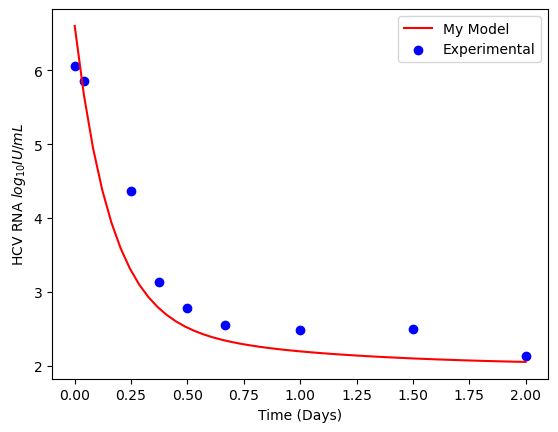

In [4]:
#My Opt parameters
epsilon = Sol_params[0]
c = Sol_params[1]
delta = Sol_params[2]

def Revised_Model(x, t, params):
        T = x[0]
        I = x[1]
        V = x[2]
    
        epsilon, delta, c = params
    
        
        B =  3e-07
        p = 8.3
        Cp = c*(1-epsilon)
        d = np.log(2)/Cp
        T0 = c*delta/(p*B)
        s = T0*np.exp(t)
    
        dTdt = s - d*T - B*V*T
        dIdt = B*V*T - delta*I
        dVdt = (1-epsilon)*p*I - c*V 
        
        return ([dTdt, dIdt, dVdt])
    
    
    


# Initial conditions
x0 = [T0, I0, V0]  # Define initial values for T, I, V
t = np.linspace(0, 2, 50)  # Time array

# Solve the ODE system
sol = odeint(Model, x0, t)

# Retrieve results
T_result = sol[:, 0]
I_result = sol[:, 1]
V_result = sol[:, 2]
plt.plot (t, V_result, color = 'red', label = 'My Model')

plt.scatter(Time_data1, V_data1, color = 'blue', label = 'Experimental')
plt.xlabel('Time (Days)')
plt.ylabel('HCV RNA $log_{10} IU/mL$')
plt.legend()
plt.show()

#### Model still falls short in comparison to the model in the paper. I obtained new model parameters within the appropiate bounds of the system but the model still demonstrates the same approximate error. 